# Working with Sample Dataset

In [3]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.shape

(11914, 16)

In [7]:
df_0 = df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'], axis=1)
df_0.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


In [8]:
df_1 = df_0.rename(columns={"Make":"Maker","Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","highway MPG":"hMPG","city mpg":"cMPG","Driven_Wheels":"Drivewheel"})
df_1.head(1)

,Maker,Model,Year,HP,Cylinders,Transmission,Drivewheel,hMPG,cMPG,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Maker         11914 non-null  object 
 1   Model         11914 non-null  object 
 2   Year          11914 non-null  int64  
 3   HP            11845 non-null  float64
 4   Cylinders     11884 non-null  float64
 5   Transmission  11914 non-null  object 
 6   Drivewheel    11914 non-null  object 
 7   hMPG          11914 non-null  int64  
 8   cMPG          11914 non-null  int64  
 9   MSRP          11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [10]:
df_1.count()

Maker           11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drivewheel      11914
hMPG            11914
cMPG            11914
MSRP            11914
dtype: int64

In [11]:
df_duplicates = df_1[df_1.duplicated()]
print(df_duplicates.shape)

(989, 10)


In [12]:
df_2 = df_1.drop_duplicates()

In [13]:
df_2.count()

Maker           10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drivewheel      10925
hMPG            10925
cMPG            10925
MSRP            10925
dtype: int64

In [14]:
df_2.isnull().sum()

Maker            0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drivewheel       0
hMPG             0
cMPG             0
MSRP             0
dtype: int64

In [15]:
df_3 =df_2.dropna()
df_3.shape

(10827, 10)

In [16]:
q_1 = df_3.quantile(0.25,numeric_only=True)
q_2 = df_3.quantile(0.75,numeric_only=True)
iqr = q_2-q_1
iqr

Year             9.0
HP             130.0
Cylinders        2.0
hMPG             8.0
cMPG             6.0
MSRP         21327.5
dtype: float64

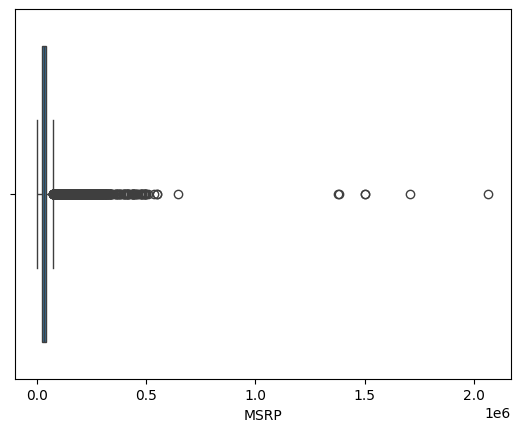

In [17]:

# plt1 = sns.boxplot(x=df_3,whis=(0,100))
plt1 = sns.boxplot(x=df_3['MSRP'])
# plt1 = sns.boxplot(x=df_3['hMPG'])
# plt1 = sns.boxplot(x=df_3['cMPG'])


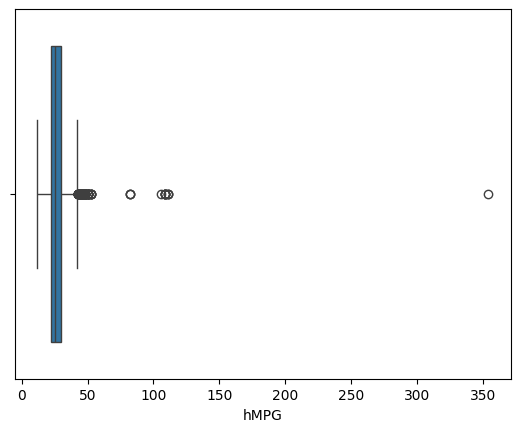

In [18]:
plt1 = sns.boxplot(x=df_3['hMPG'])

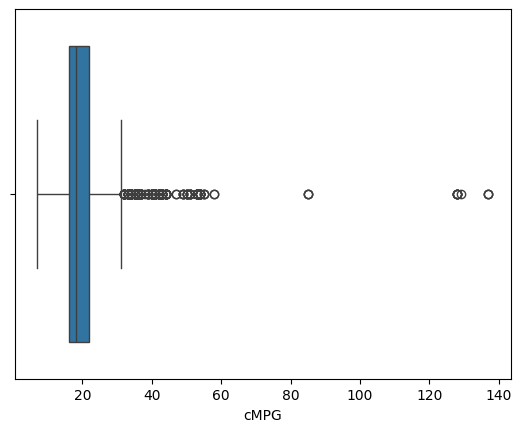

In [19]:
plt1 = sns.boxplot(x=df_3['cMPG'])

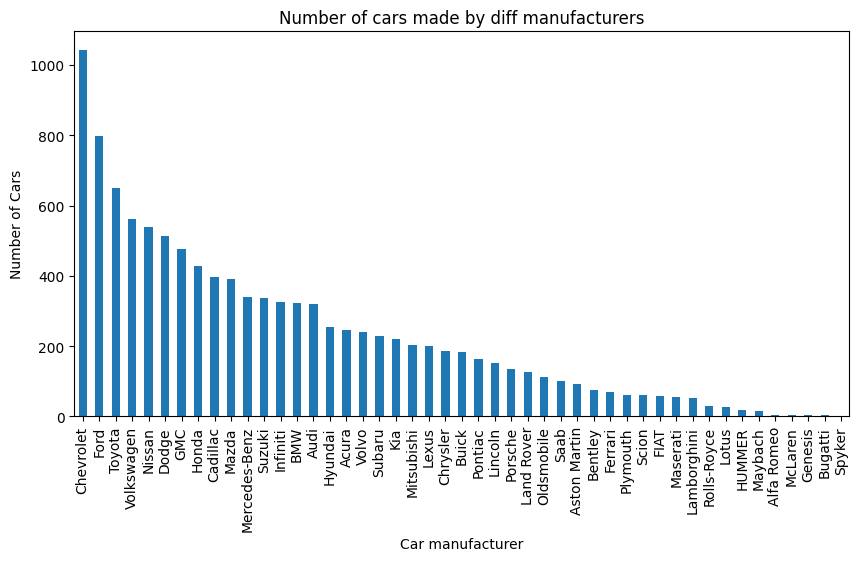

In [20]:
df_3.Maker.value_counts().nlargest(100).plot(kind='bar',figsize=(10,5))
plt.title("Number of cars made by diff manufacturers")
plt.ylabel("Number of Cars")
plt.xlabel("Car manufacturer")
plt.show()

In [21]:
df_hm = df_3.drop(['Maker','Model','Transmission','Drivewheel'],axis=1)
df_hm.head(1)

,Year,HP,Cylinders,hMPG,cMPG,MSRP
0,2011,335.0,6.0,26,19,46135


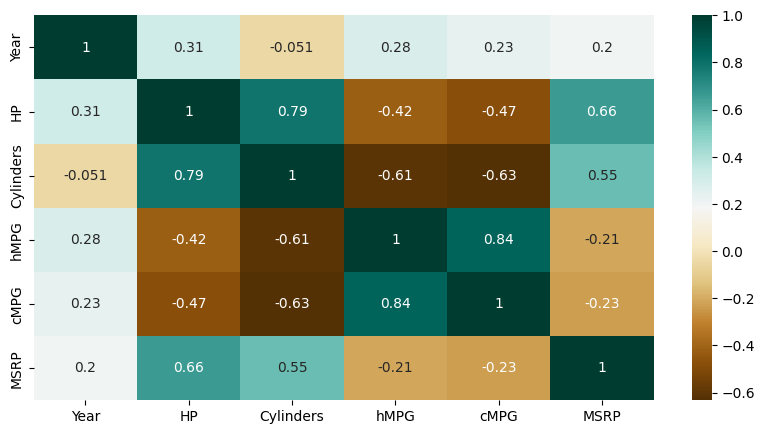

In [22]:
plt.figure(figsize=(10,5))
c=df_hm.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.show()


In [28]:
df_col_1 = df_3['HP']

In [29]:
df_col_2 = df_3['MSRP']

In [30]:
df_3["Cylinders_MSRP"] = df_col_2*df_col_1

C:\Users\user\AppData\Local\Temp\ipykernel_20496\242957735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["Cylinders_MSRP"] = df_col_2*df_col_1


In [ ]:
df_4 = df_3.loc[0:12, ['Model','Year']]
df_4

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [45]:
df_3.loc[0:12]

,Maker,Model,Year,HP,Cylinders,Transmission,Drivewheel,hMPG,cMPG,MSRP,Cylinders_MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135,15455225.0
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650,12195000.0
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350,10905000.0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450,6773500.0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500,7935000.0
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200,7176000.0
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100,13230000.0
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300,11790000.0
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900,8487000.0
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200,8556000.0
